In [1]:
import zarr
import napari
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from pathlib import Path
import numpy as np

# Define plotting function

In [21]:
def plot_mip(ome_path, res_level, axis, vmin, vmax, res_level_res, save_dir=None):
    ome_path = Path(ome_path)

    ome_zarr_res_path = ome_path / str(res_level)
    ome_zarr = zarr.open_array(ome_zarr_res_path)
    im_ra = ome_zarr[:, :, :]  
    mip = np.amax(im_ra, axis=axis) 

    fig, ax = plt.subplots()
    ax.imshow(mip, cmap="gray", vmin=vmin, vmax=vmax)

    # add scale bar
    npix = 50
    size = npix * res_level_res[1]
    scale_label = f"{size} um"
    scalebar = AnchoredSizeBar(
        ax.transData,
        npix,
        scale_label,
        "lower left",
        pad=0.1,
        color="white",
        frameon=False,
        size_vertical=1,
    )
    plt.gca().add_artist(scalebar)
    ax.set_xticks([])
    ax.set_yticks([])
    if save_dir is not None:
        save_dir = Path(save_dir)
        plt.savefig(save_dir / f"lvl-{res_level}_ax-{axis}_vmin-{vmin}_vmax-{vmax}.jpg")
    plt.show()
    return mip




# Display and save with pyplot

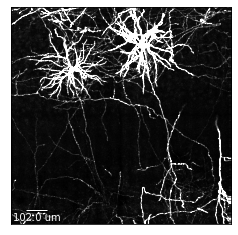

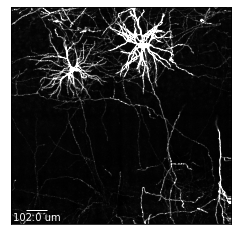

In [19]:
zero_level_res = [3, 0.51, 0.51]  # zxy resolution, in microns
res_level = 2
ome_path = "/Users/thomasathey/Documents/mimlab/mouselight/brainlit_parent/brainlit/experiments/sriram/data/test-czi/fg_ome.zarr"  # "E:\\Projects\\KolodkinLab\\Sriram\\brainlit-tracing\\brainlit\\experiments\\sriram\\data\\"
axis = 0
vmin, vmax = 0, 100

for vmax in [50,100]:
    res_level_res = [
        zero_level_res[0],
        2**res_level * zero_level_res[1],
        2**res_level * zero_level_res[2],
    ]
    plot_mip(ome_path, res_level, axis, vmin, vmax, res_level_res, save_dir="/Users/thomasathey/Documents/mimlab/mouselight/brainlit_parent/brainlit/experiments/sriram/data/test-czi/")

# Display with napari

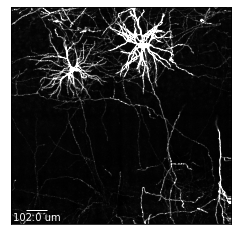

In [22]:
mip = plot_mip(ome_path, res_level, axis, vmin, vmax, res_level_res)

v = napari.Viewer()
v.add_image(mip, scale=res_level_res[1:])

v.scale_bar.visible = True
v.scale_bar.unit = "um"